# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [36]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

np.random.seed(5)
import warnings
warnings.filterwarnings('ignore')

In [38]:
# 設定 模型 估計參數 (n_clusters:群數, n_init:運行KMeans算法的次數, init:初始化方法)
estimators = [("k_means_iris_6", KMeans(n_clusters=6)),
              ("k_means_iris_3", KMeans(n_clusters=3)),
              ("k_means_iris_bad_init", KMeans(n_clusters=3, n_init=1, init="random"))]

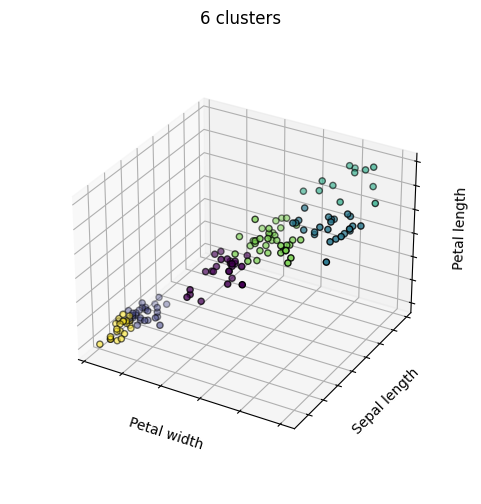

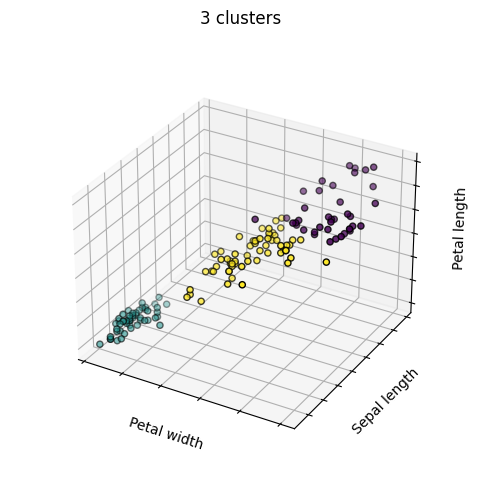

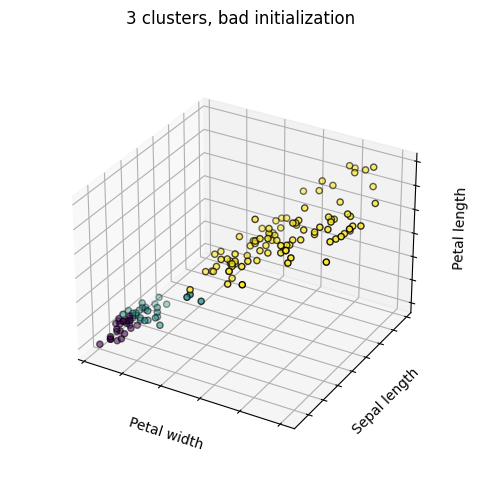

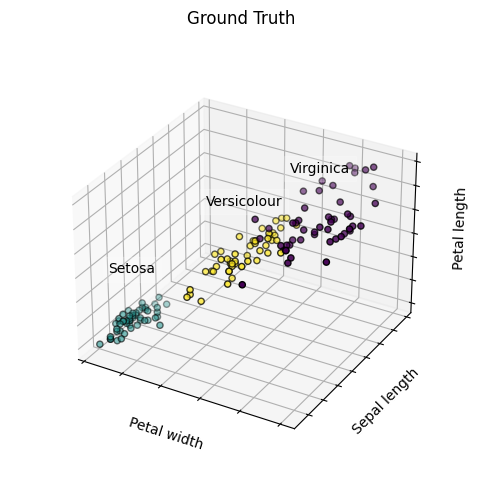

In [39]:
# 資料建模 並 視覺化 結果
fignum = 1
titles = ["6 clusters", "3 clusters", "3 clusters, bad initialization"]

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')  # 使用 add_subplot 替代 Axes3D

    # fit data
    est.fit(X)  # 建立模型
    labels = est.labels_  # 獲得模型分群後的label
    ax.scatter(X[:, 3], X[:, 0], X[:, 2],  # 繪製 x 中的第3, 0, 2個維度的特徵
               c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel("Petal width")
    ax.set_ylabel("Sepal length")
    ax.set_zlabel("Petal length")
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum += 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

for name, label in [("Setosa", 0),
                    ("Versicolour", 1),
                    ("Virginica", 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment="center",
              bbox=dict(alpha=.2, edgecolor="w", facecolor="w"))

# Reorder the labels to have colors matching the cluster results
# 重新排序標籤使顏色和分群結果對應
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
ax.set_title("Ground Truth")
ax.dist = 12

plt.show()